# 피마 인디언 당뇨병 (Pima Indians Diabets Dataset)
---

### 데이터 준비

In [40]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [42]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [43]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 이상치 확인

In [45]:
def iszero(x):
    return x == 0

In [46]:
diabetes.apply(iszero).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [47]:
df = diabetes.copy()

In [48]:
df.loc[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [49]:
df['Glucose'].replace(0,np.nan, inplace = True)

In [50]:
df.loc[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [51]:
for col in ['BloodPressure','SkinThickness','Insulin','BMI']:
    df[col].replace(0,np.nan, inplace = True)

In [52]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [53]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [54]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

print(X_train.shape, y_train.shape)

(614, 8) (614,)


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
y_train = y_train.values

In [58]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [59]:
lg.score(X_train, y_train) # R^2 0~1 1에 가까울수록 좋은 값이에용

0.7654723127035831

### 테스트 

In [60]:
X_test = scaler.fit_transform(X_test) 
y_test = y_test.values

In [70]:
y_pred = lg.predict_proba(X_test)

In [71]:
y_pred = np.argmax(y_pred, axis=1)

In [73]:
#분류모델이라 평가지표를 회귀모델이아닌 다른걸로 해야합니다.

my.print_score(y_test, y_pred)

accuracy: 0.8116883116883117
precision: 0.8048780487804879
recall: 0.6111111111111112


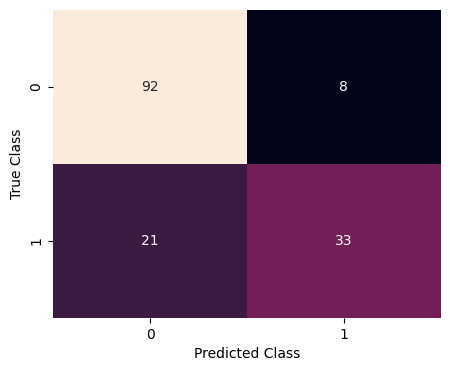

In [77]:
my.plot_confusion_matrix(y_test,y_pred)